In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
mdc = pd.read_csv('report-species.tsv', sep='\t').T
mdc.drop(['Numero da amostra','Nome da amostra','TOTAL', 'Local-Etapa'],inplace=True)
mdc.reset_index(level=0, inplace=True)
mdc.head()

,index,0,1
0,Acetoanaerobium noterae,18,6
1,Achromobacter piechaudii,0,2
2,Achromobacter xylosoxidans,218,45
3,Acidovorax delafieldii,1,22
4,Acinetobacter baylyi,4,0


### Simpson Index

Simpson's Diversity Index is a measure of diversity which takes into account the number of species present, as well as the relative abundance of each species. As species richness and evenness increase, so diversity increases.
The value ranges between 0 and 1. With this index, 1 represents infinite diversity and 0, no diversity.

In [25]:
from skbio.diversity.alpha import simpson
#anode
print('Simpson index for anode is:',simpson(mdc[0]))
#cathode
print('Simpson index for cathode is:',simpson(mdc[1]))

Simpson index for anode is: 0.9342648041011765
Simpson index for cathode is: 0.47067613785020934


### [Fischer](http://groundvegetationdb-web.com/ground_veg/home/diversity_index) alpha Index

Fisher's logarithmic series model (Fisher et.al., 1943) represented the first attempt to describe mathematically the relationship between the number of species and the number of individuals in those species. Although originally used as an appropriate fit to empirical data, its wide application, especially in entomological research, has led to a thorough examination of its properties (Taylor, 1978). The small number of abundant species and the large proportion of 'rare' species (the class containing one individual is always the largest) predicted by the log series model suggest that, like the geometric series, it will be most applicable in situations where one or a few factors dominate the ecology of a community. For instance Magurran (1981) showed that species abundances of ground flora in an Irish conifer plantation (in which ligth is greatly limited) followed a log series distribution.

In [31]:
b_mdc= mdc.replace(to_replace = 0, value =0.0000000000001) 

In [36]:
from skbio.diversity.alpha import fisher_alpha
#anode
print('Fisher alpha index for anode is:',fisher_alpha(b_mdc[0]))
#cathode
print('Fisher alpha index for cathode is:',fisher_alpha(b_mdc[1]))

Fisher alpha index for anode is: 51.83856609821831
Fisher alpha index for cathode is: 42.698243124894645


### Shannon Index
Calculate Shannon entropy of counts (H), default in bits.

In [37]:
from skbio.diversity.alpha import shannon
#anode
print('Shannon index for anode is:',shannon(b_mdc[0], base=2))
#cathode
print('Shannon index for cathode is:',shannon(b_mdc[1], base=2))

Shannon index for anode is: 4.724670806582826
Shannon index for cathode is: 1.8187276856732995


### Singles occurences

This function calculates number of single occurrences (singletons).

In [32]:
from skbio.diversity.alpha import singles
#anode
print('Singles occurences for anode:',singles(mdc[0]))
#cathode
print('Singles occurences for anode:',singles(mdc[1]))

Singles occurences for anode: 53
Singles occurences for anode: 66


### Observed OTUs

This function calculates the number of distinct OTUs.

In [33]:
from skbio.diversity.alpha import observed_otus
#anode
print('Observed OTUs for anode:',observed_otus(mdc[0]))
#cathode
print('Observed OTUs for anode:',observed_otus(mdc[1]))

Observed OTUs for anode: 183
Observed OTUs for anode: 211


### Dominance

Calculate dominance. It can also be defined as 1 - Simpson’s index. It ranges between 0 and 1.

In [34]:
from skbio.diversity.alpha import dominance
#anode
print('Dominance for anode:',dominance(mdc[0]))
#cathode
print('Dominance for anode:',dominance(mdc[1]))

Dominance for anode: 0.06573519589882344
Dominance for anode: 0.5293238621497907


### Good's coverage
Calculate Good’s coverage of counts.

In [39]:
from skbio.diversity.alpha import goods_coverage
#anode
print('Goods coverage for anode:',goods_coverage(mdc[0]))
#cathode
print('Goods coverage for anode:',goods_coverage(mdc[1]))

Goods coverage for anode: 0.9964678440519826
Goods coverage for anode: 0.9984179111633147


### Berger-Parker dominance index
Measure of the numerical importance of the most abundant species.

In [40]:
from skbio.diversity.alpha import berger_parker_d
#anode
print('Berger-Parker index (D) for anode:',berger_parker_d(mdc[0]))
#cathode
print('Berger-Parker index (D) for anode:',berger_parker_d(mdc[1]))

Berger-Parker index (D) for anode: 0.16501166277907364
Berger-Parker index (D) for anode: 0.7088716830069276


### Strong’s dominance index (Dw)

Measures species abundance unevenness. Determination of Dw was based on the maximum difference between cumulative proportion (also referred to as Lorenz curve or partial order) and perfect evenness values. 
More explanation: Strong, W.L. (2002). [Assessing species abundance unevenness within and between plant communities](https://link.springer.com/article/10.1556/ComEc.3.2002.2.9). Community Ecology (3): 237-246.

In [41]:
from skbio.diversity.alpha import strong
#anode
print('Strong dominance index (Dw) for anode:',strong(mdc[0]))
#cathode
print('Strong dominance index (Dw) for anode:',strong(mdc[1]))

Strong dominance index (Dw) for anode: 0.7638878115309469
Strong dominance index (Dw) for anode: 0.9024043410536375


### Menhinick index

Species richness is a measure of the number of species found in a sample. Since the larger the sample,
the more species we would expect to find, the number of species is divided by the square root of the
number of individuals in the sample. This particular measure of species richness is known as D, the
Menhinick's index.

In [42]:
from skbio.diversity.alpha import menhinick
#anode
print('Menhinick richness index (Dw) for anode:',menhinick(mdc[0]))
#cathode
print('Menhinick richness index (Dw) for anode:',menhinick(mdc[1]))

Menhinick richness index (Dw) for anode: 1.493939773881131
Menhinick richness index (Dw) for anode: 1.0330608910011765


### Margalef’s richness index (D_mg)
This function measures the variety of species in a given area or sample, which is calculated based on emerged species (s), and the individuals (n) of total emerged species.

In [43]:
from skbio.diversity.alpha import margalef
#anode
print('Margalef richness index (D_mg) for anode:',margalef(mdc[0]))
#cathode
print('Margalef richness index (D_mg) for anode:',margalef(mdc[1]))

Margalef richness index (D_mg) for anode: 18.926515577883457
Margalef richness index (D_mg) for anode: 19.73932065419114


### McIntosh dominance index D

In [44]:
from skbio.diversity.alpha import mcintosh_d
#anode
print('Mcintosh dominance index (D) for anode:',mcintosh_d(mdc[0]))
#cathode
print('Mcintosh dominance index (D) for anode:',mcintosh_d(mdc[1]))

Mcintosh dominance index (D) for anode: 0.7497317548369865
Mcintosh dominance index (D) for anode: 0.27379403459246343


## Anode

In [45]:
mdc_anod = mdc.copy().drop(mdc.columns[[2]], axis=1)
new_df = mdc_anod[mdc_anod[0] > 80]
new_df.loc[len(new_df)] = ["Others", mdc_anod[mdc_anod[0] <= 100][0].sum()]
new_df

/home/mone/.local/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,index,0
2,Achromobacter xylosoxidans,218
21,Alcaligenes faecalis,997
23,Alcanivorax pacificus,238
34,Aquamicrobium defluvii,963
36,Arcobacter butzleri,562
67,Brevundimonas abyssalis,81
69,Brevundimonas diminuta,440
91,Delftia tsuruhatensis,458
94,Desulfomicrobium baculatum,1268
97,Devosia chinhatensis,272


In [46]:
new_df_2=np.array(new_df)
new_df_2

array([['Achromobacter xylosoxidans', 218],
       ['Alcaligenes faecalis', 997],
       ['Alcanivorax pacificus', 238],
       ['Aquamicrobium defluvii', 963],
       ['Arcobacter butzleri', 562],
       ['Brevundimonas abyssalis', 81],
       ['Brevundimonas diminuta', 440],
       ['Delftia tsuruhatensis', 458],
       ['Desulfomicrobium baculatum', 1268],
       ['Devosia chinhatensis', 272],
       ['Devosia hwasunensis', 152],
       ['Halothiobacillus neapolitanus', 348],
       ['Hyphomonas polymorpha', 93],
       ['Macellibacteroides fermentans', 289],
       ['Mesotoga prima', 431],
       ['Methanosarcina mazei', 361],
       ['Mycobacterium peregrinum', 130],
       ['Paracoccus pantotrophus', 2476],
       ['Pseudochrobactrum saccharolyticum', 477],
       ['Pseudomonas balearica', 136],
       ['Rhizobium helanshanense', 1111],
       ['Rhodococcus erythropolis', 93],
       ['Stappia indica', 1411],
       ['Stenotrophomonas maltophilia', 98],
       ['Thauera chloroben

In [47]:
order = []
anode = []
for item in new_df_2:
    order.append(item[0])
    anode.append(item[1])   

In [48]:
type(order), type(anode)

(list, list)

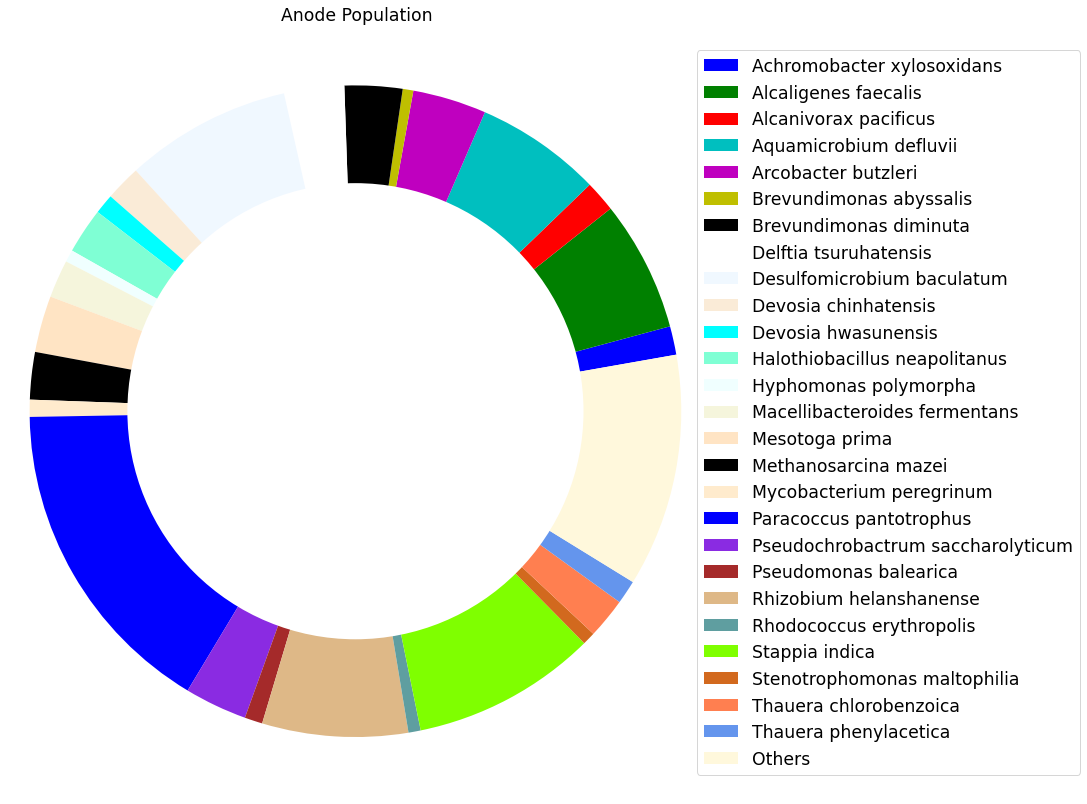

In [49]:
from __future__ import division
from matplotlib import colors as mcolors
labels = order[0:33]
sizes = anode[0:33]
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
fig1, ax1 = plt.subplots(figsize=(10,11))
patches = ax1.pie(sizes, colors=colors,shadow=False, startangle=10)
centre_circle = plt.Circle((0,0),0.7,fc='white')
fig = plt.gcf()
fig.patch.set_facecolor('xkcd:white')
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.title('Anode Population', fontsize='xx-large')
plt.legend(labels, bbox_to_anchor=(0.975,0.98),fontsize='xx-large', loc="upper left")
plt.savefig('specie_anode.png', dpi = 400)
plt.show()

## Cathode

In [50]:
mdc_cathod = mdc.copy().drop(mdc.columns[[1]], axis=1)
new_df2 = mdc_cathod[mdc_cathod[1] > 80]
new_df2.loc[len(new_df2)] = ["Others", mdc_cathod[mdc_cathod[1] <= 80][1].sum()]
new_df2

/home/mone/.local/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,index,1
21,Alcaligenes faecalis,92
24,Alicycliphilus denitrificans,599
52,Bacillus niacini,92
53,Bacillus pichinotyi,685
54,Bacillus pumilus,245
184,Nitrosomonas europaea,6684
185,Nitrosomonas eutropha,890
198,Paracoccus denitrificans,258
201,Paracoccus marinus,229
202,Paracoccus pantotrophus,29572


In [51]:
new_df_3=np.array(new_df2)
new_df_3

array([['Alcaligenes faecalis', 92],
       ['Alicycliphilus denitrificans', 599],
       ['Bacillus niacini', 92],
       ['Bacillus pichinotyi', 685],
       ['Bacillus pumilus', 245],
       ['Nitrosomonas europaea', 6684],
       ['Nitrosomonas eutropha', 890],
       ['Paracoccus denitrificans', 258],
       ['Paracoccus marinus', 229],
       ['Paracoccus pantotrophus', 29572],
       ['Paracoccus rhizosphaerae', 179],
       ['Paracoccus solventivorans', 130],
       ['Pseudomonas stutzeri', 263],
       ['Simplicispira limi', 127],
       ['Thauera phenylacetica', 90],
       ['Others', 1582]], dtype=object)

In [52]:
order2 = []
cathode = []
for item in new_df_3:
    order2.append(item[0])    
    cathode.append(item[1])

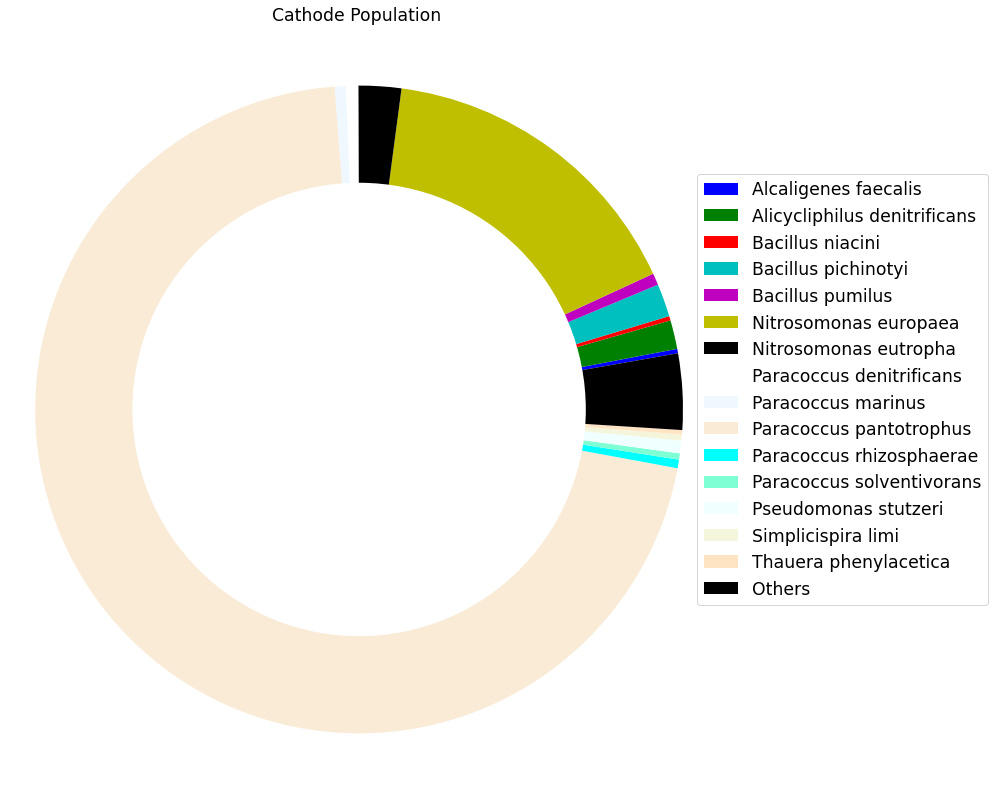

In [53]:
from __future__ import division
from matplotlib import colors as mcolors
labels = order2[0:70]
sizes = cathode[0:70]
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
fig1, ax1 = plt.subplots(figsize=(10,11))
patches = ax1.pie(sizes,colors=colors, shadow=False, startangle=10)
centre_circle = plt.Circle((0,0),0.7,fc='white')
fig = plt.gcf()
fig.patch.set_facecolor('xkcd:white')
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.title('Cathode Population', fontsize='xx-large')
plt.legend(labels, bbox_to_anchor=(0.975,0.82),fontsize='xx-large', loc="upper left")
plt.savefig('specie_cathode.png', dpi = 400)
plt.show()